In [28]:
import copy

import matplotlib.pyplot as plt
# params = {'mathtext.default': 'regular' }
params = {'text.usetex': True, 'font.family': 'sans-serif', 'figure.dpi': 400}
plt.rcParams.update(params)

# plt.rcParams['text.latex.preamble'] = [
#        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
#        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
#        r'\usepackage{helvet}',    # set the normal font here
#        r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
#        r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
# ]

import numpy as np
import seaborn as sns
sns.set()
#sns.set(style="whitegrid")
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.5})

# Eigenschaften

## Terminiertheit

Terminiertheit bedeutet, dass ein Algorithmus nach endlich vielen Schritten anhält, oder er bricht kontrolliert ab. Einfache Beispiele:
* Addition zweier Dezimalzahlen
* Summe der ersten N natürlichen Zahlen

Allerdings kann die Terminiertheit nicht für alle Algerithmen gezeigt werden. Das [Halteproblem](https://de.wikipedia.org/wiki/Halteproblem) besagt, dass es gibt keinen Verfahren gibt, welches immer zutreffend sagen kann, ob der Algorithmus für die Eingabe terminiert. Hierzu kann das [Collatz-Problem](https://de.wikipedia.org/wiki/Collatz-Problem) als Beispiel herangezogen werden. 

Die Zahlenfolge wird wie folgt konstruiert: 
* beginne mit irgendeiner natürlichen Zahl $\sf n_0 > 0$
* ist $\sf n_i$ gerade so ist $\sf n_{i+1} = n_i/2$
* ist $\sf n_i$ ungerade so ist $\sf n_{i+1} = 3n_i + 1$
* endet bei $\sf n_i = 1$

Collatz-Vermutung: Jede so konstruierte Zahlenfolge mündet in den Zyklus 4, 2, 1, egal, mit welcher natürlichen Zahl man beginnt. Bisher unbewiesen.

## Determiniertheit

Ein deterministischer Algorithmus ist ein Algorithmus, bei dem nur definierte und reproduzierbare Zustände auftreten. Die Ergebnisse des Algorithmus sind somit immer reproduzierbar. Beispiele hierfür:
* Addition ganzer Zahlen
* Selectionsort
* Collatz-Sequenz

## Effizienz

Die Effizienz eines Algorithmus ist nicht strikt definiert und kann folgende Aspekte umfassen: 
* Laufzeit
* Speicheraufwand
* Energieverbrauch

Bei bestimmten Anwendungen sind entsprechende Eigenschaften notwendig:
* Speicheraufwand bei *Big Data*, also riesige Datenmengen, z.B. in der Bioinformatik
* Laufzeit bei Echtzeitanwendung, z.B. Flugzeugsteuerung, Fußgängerdynamik

## Komplexität

Bei der Analyse von Algorithmen, gilt es die Komplexiät zu bestimmen, welche ein Maß für den Aufwand darstellt. Dabei wird nach einer Aufwandfunktion $\sf f(n)$ gesucht, welche von der Problemgröße $\sf n$ abhängt. Beispiel für eine Problemgröße:
* Anzahl der Summanden bei einer Summe 
* Anzahl der zu sortierenden Zahlen

Meist wird dabei die Bestimmung auf eine asymptotische Analyse, d.h. eine einfache Vergleichsfunktion $\sf g(n)$ mit $\sf n \rightarrow \infty$, reduziert. Dabei beschränkt $\sf g(n)$ das Wachstum von $\sf f(n)$.

Die Funktion $\sf g(n)$ wird oft durch ein $\sf \mathcal{O}$ gekennzeichnet und gibt so eine möglichst einfache Vergleichsfunktion an. Beispiele:

* $\sf f_1(n) = n^4 + 5n^2 - 10 \approx \mathcal{O}(n^4) = g_1(n)$ 
* $\sf f_2(n) = 2^{n+1} \approx \mathcal{O}(2^n) = g_2(n)$ 

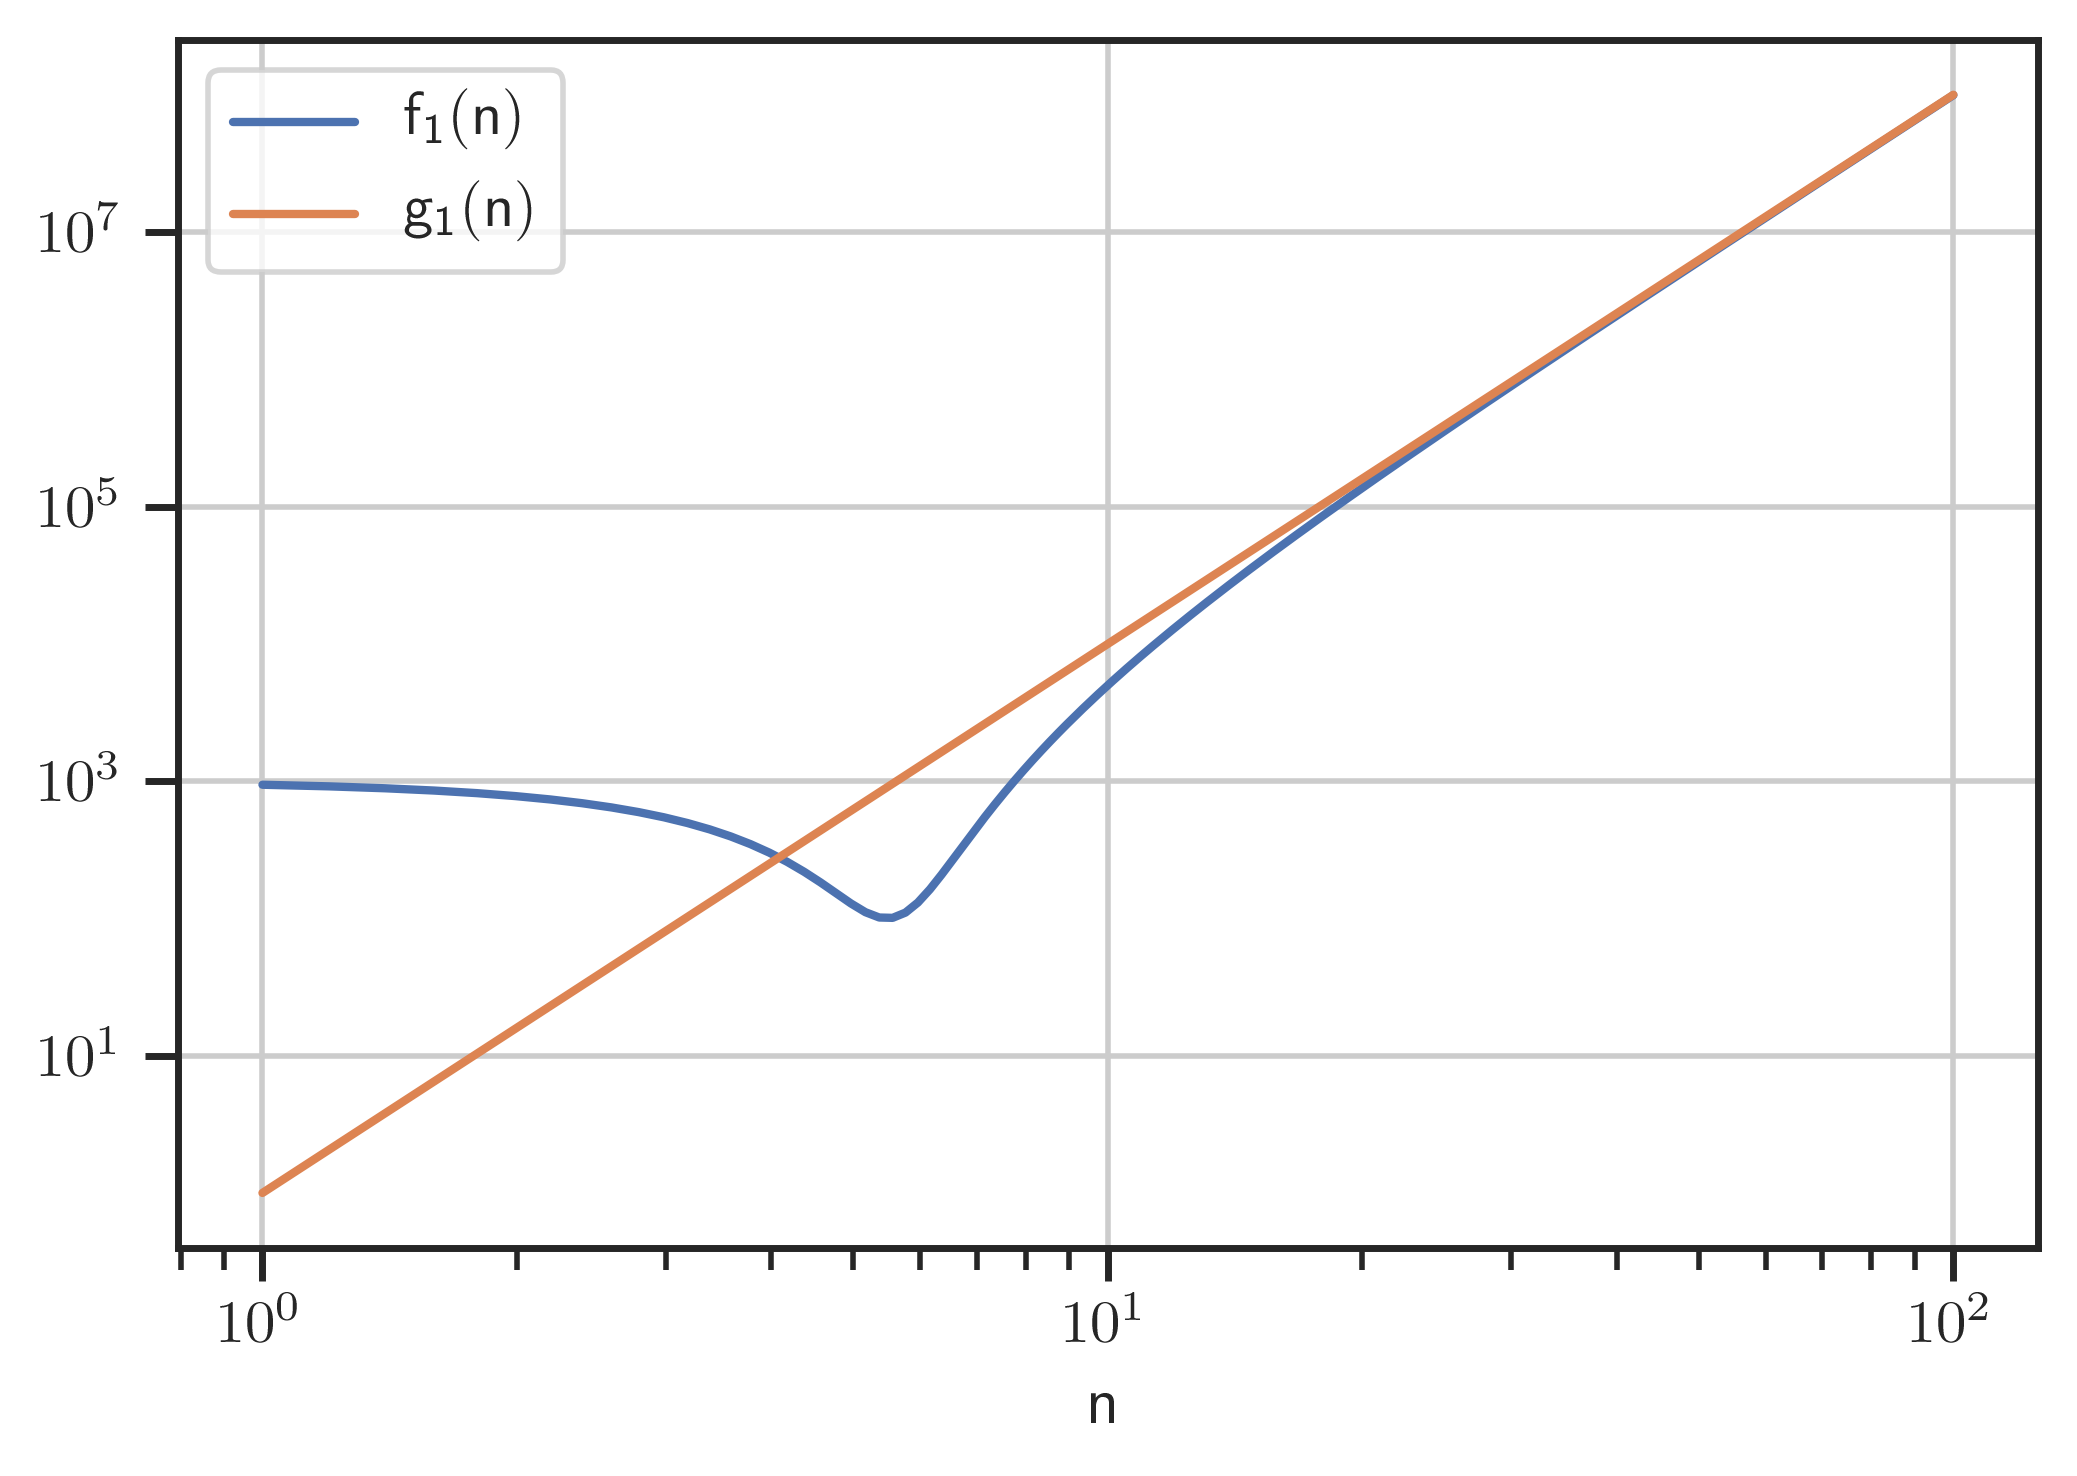

In [29]:
x = np.linspace(1,100,500)
f = x**4 - 60*x**2 + 1000
g = x**4

plt.plot(x,f, label='$\sf f_1(n)$')
plt.plot(x,g, label='$\sf g_1(n)$')
plt.xlabel('n')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig('./bilder/komplexitaet.png')

Um sich ein besseres Bild zu den Auswirkungen hoher Kompexitäten zu machen, sei folgendes Beispiel gegeben.
* ein Berechnungsschritt (unabhängig von der Problemgröße $\sf n$) sei z.B. 1 s lang
* das $\sf n$ sei beispielsweise 1000

Damit ergeben sich folgende (asymptotische) Abschätzungen der Laufzeit:
* $\sf \mathcal{O}(n)$: 10<sup>3</sup> s ≈ 1 h 
* $\sf \mathcal{O}(n^2)$: 10<sup>6</sup> s ≈ 11 d 
* $\sf \mathcal{O}(n^3)$: 10<sup>9</sup> s ≈ 31 a 
* $\sf \mathcal{O}(2^n)$: 2<sup>1000</sup> s ≈ ...

### Komplexität Selectionsort

Die Kompexität dieses Verfahrens kann leicht abgeschätzt werden. Bei jedem Durchlauf wir das Minimum / Maximum gesucht, was anfangs $\sf n$ Operationen benötigt. Beim nächsten Durchlauf sind es nur noch $\sf n − 1$ Operationen und so weiter. In der Summe sind es also 

$$ \sf f(n) = \sum_{i=0}^n i = \frac{n(n-1)}{2} \approx \mathcal{O}(n^2) $$

Damit hat der Selectionsort eine Komplexität von $\sf \mathcal{O}(n^2)$. Die folgende Abbildung verdeutlicht dies nochmals.

In [2]:
def sort_sel(A):
    cnt = 0
    n = len(A)
    for i in range(n):
        mv = A[i]
        mi = i
        for j in range(i, n):
            cnt += 1
            if A[j] < mv:
                mv = A[j]
                mi = j
#                 cnt += 1
        A[mi] = A[i]
        A[i] = mv
#         cnt += 1
    return cnt

def sort_bubble(A):
    cnt = 0
    n = len(A)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
#             print(j, 0, n-i)
            cnt += 1
            if A[j+1] < A[j]:
                mv = A[j]
                A[j] = A[j+1]
                A[j+1] = mv
#                 cnt += 3
                swapped = True
        if swapped == False:
#             print('no swap', i)
            return cnt
    return cnt

In [3]:
def analyse_sorting(sort_fnk, non_rand_p = 0.0, reps = 100):
    n_max = 100001
    rand_A = np.random.randint(0, high=n_max // 2, size=10*n_max)

    def time_sorting(n):
        i = np.random.randint(0, n_max, size=1)[0]
        A = np.copy(rand_A[i:i+n])
        non_rand_i = np.linspace(0, n-1, int(n*non_rand_p), dtype=np.int)
#         print(n, len(non_rand_i))
        A[non_rand_i] = np.linspace(0, n_max//2, len(non_rand_i), dtype=np.int)
#         print(A)
        return sort_fnk(A)

    res_min = []
    res_avg = []
    res_max = []
    ns = []

# for n in range(1, 10, 1):
#     print(n)
#     res = []
#     for r in range(reps):
#         res.append(time_sorting(n))
#     ns.append(n)
#     res_min.append(np.min(res))
#     res_max.append(np.max(res))
#     res_avg.append(np.average(res))

    for n in range(10, 101, 10):
#         print(n)
        res = []
        for r in range(reps):
            res.append(time_sorting(n))
        ns.append(n)
        res_min.append(np.min(res))
        res_max.append(np.max(res))
        res_avg.append(np.average(res))
        print(n, np.average(res))

#     for n in range(100, 1101, 100):
#         print(n)
#         res = []
#         for r in range(reps):
#             res.append(time_sorting(n))
#         ns.append(n)
#         res_min.append(np.min(res))
#         res_max.append(np.max(res))
#         res_avg.append(np.average(res))
    
    return np.array(ns), np.array(res_min), np.array(res_avg), np.array(res_max)

In [42]:
def plot_sorting(res, label, avg_only = False, title=None):
    
    ns, y1, y2, y3 = res
    
    if not avg_only:
        plt.plot(ns, y1, color='C0', lw=0.5)
        plt.plot(ns, y3, color='C0', lw=0.5, label='Min / Max')
        plt.fill_between(ns, y1, y3, alpha=0.3, color='C0')
    plt.plot(ns, y2, color='C1', label='Mittelwert')

    yi1 = 1e0 * ns
    yi2 = 1e0 * ns**2

    plt.plot(ns, yi1, ls=':', color='C2', label='Hilfslinien, $\sf \mathcal{O}(n)$, $\sf \mathcal{O}(n^2)$')
    plt.plot(ns, yi2, ls=':', color='C2')

    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel('Länge der Werteliste')
    plt.ylabel('Durchgeführte Operationen')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.savefig('./bilder/{}.png'.format(label))
    plt.show()

In [31]:
res1 = analyse_sorting(sort_bubble, non_rand_p = 0.0, reps = 1000)

10 41.767
20 181.388
30 418.683
40 756.091
50 1192.313
60 1731.029
70 2368.83
80 3104.415
90 3938.126
100 4873.505


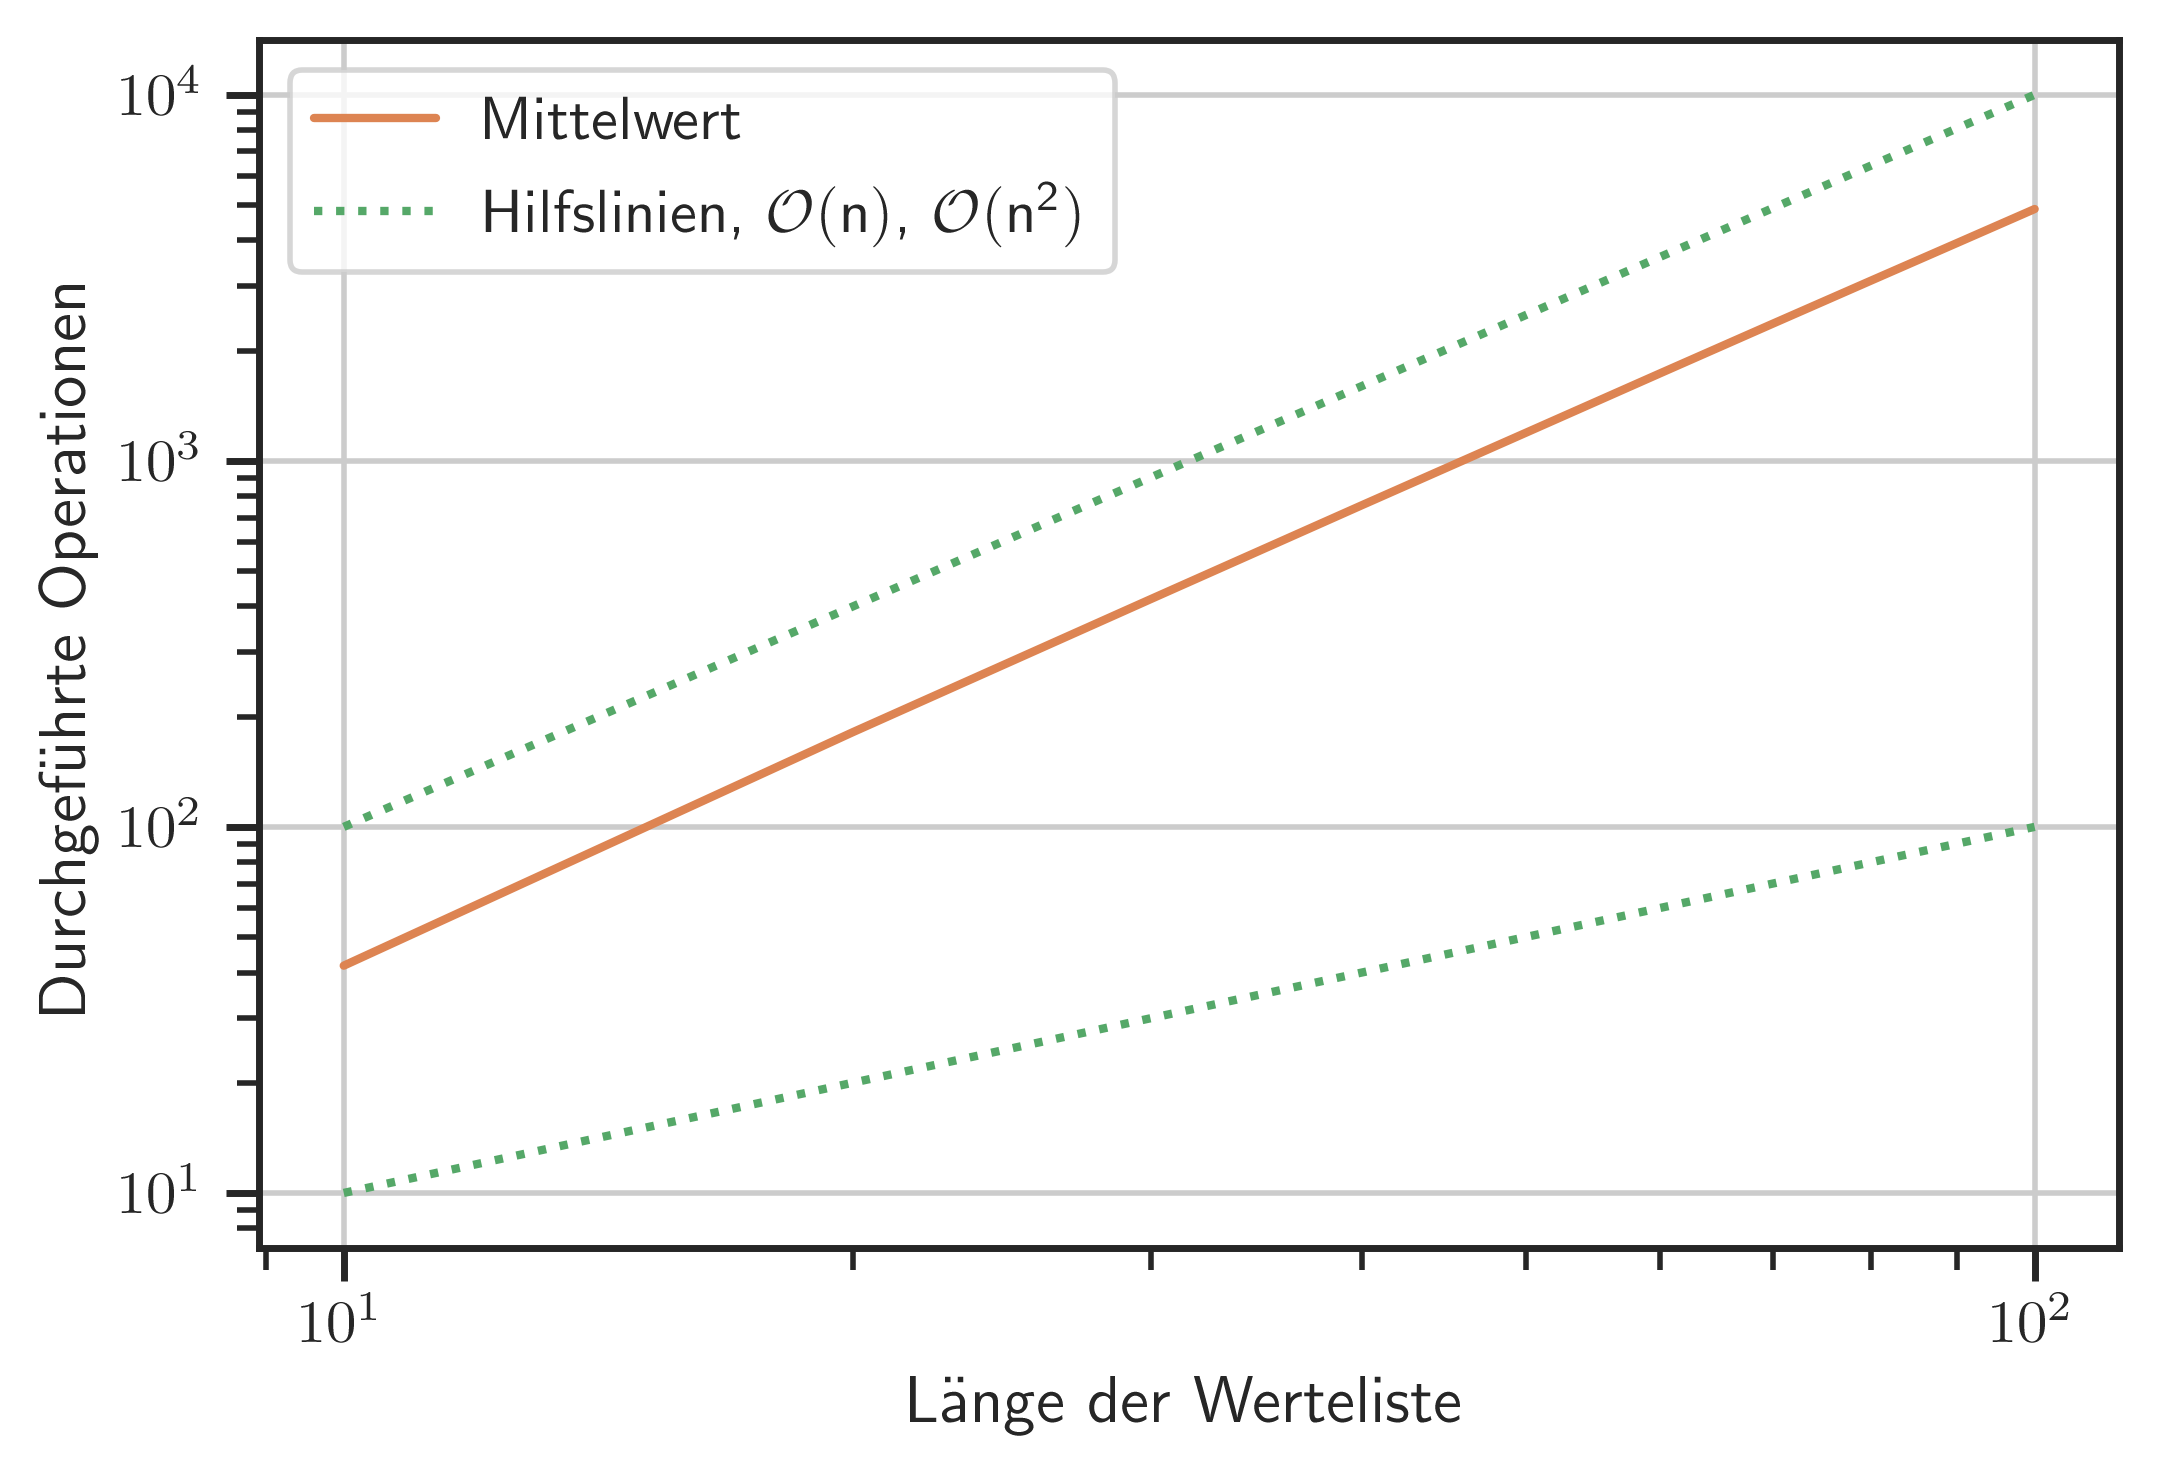

In [32]:
plot_sorting(res1, 'sort_selection', avg_only = True)

### Komplexität Bubblesort

Die Komplexität des Bubblesort muss unterschieden werden in den günstigsten Fall (best case), den ungünstigsten Fall (worst case) und einem durchschnittlichen Fall (average case):
* best case: $\sf \mathcal{O}(n)$
* worst case: $\sf \mathcal{O}(n^2)$ 
* average case: $\sf \mathcal{O}(n^2)$

Der best case ergibt sich zum Beispiel, falls die Eingabeliste bereits sortiert ist, da der Algorithmus nur einmal durch die Liste gehen muss, entsprechend n-Mal. Folgende Abbildung verdeutlicht die Anzahl der durchgeführten Operationen im Falle einer vollständig zufälligen Liste und einer, bei welcher 95% der Werte bereits sortiert ist. Dabei wurden für jedes $\sf n$ jeweils 10000 Listen sortiert. Es ist der Mittelwert und die minimalen und maximalen Operationen dargestellt.

In [46]:
res2 = analyse_sorting(sort_bubble, non_rand_p = 0.0, reps = 10000)

10 41.9771
20 180.9056
30 419.1366
40 757.1751
50 1194.1693
60 1730.5423
70 2367.3012
80 3105.0884
90 3940.9098
100 4877.428


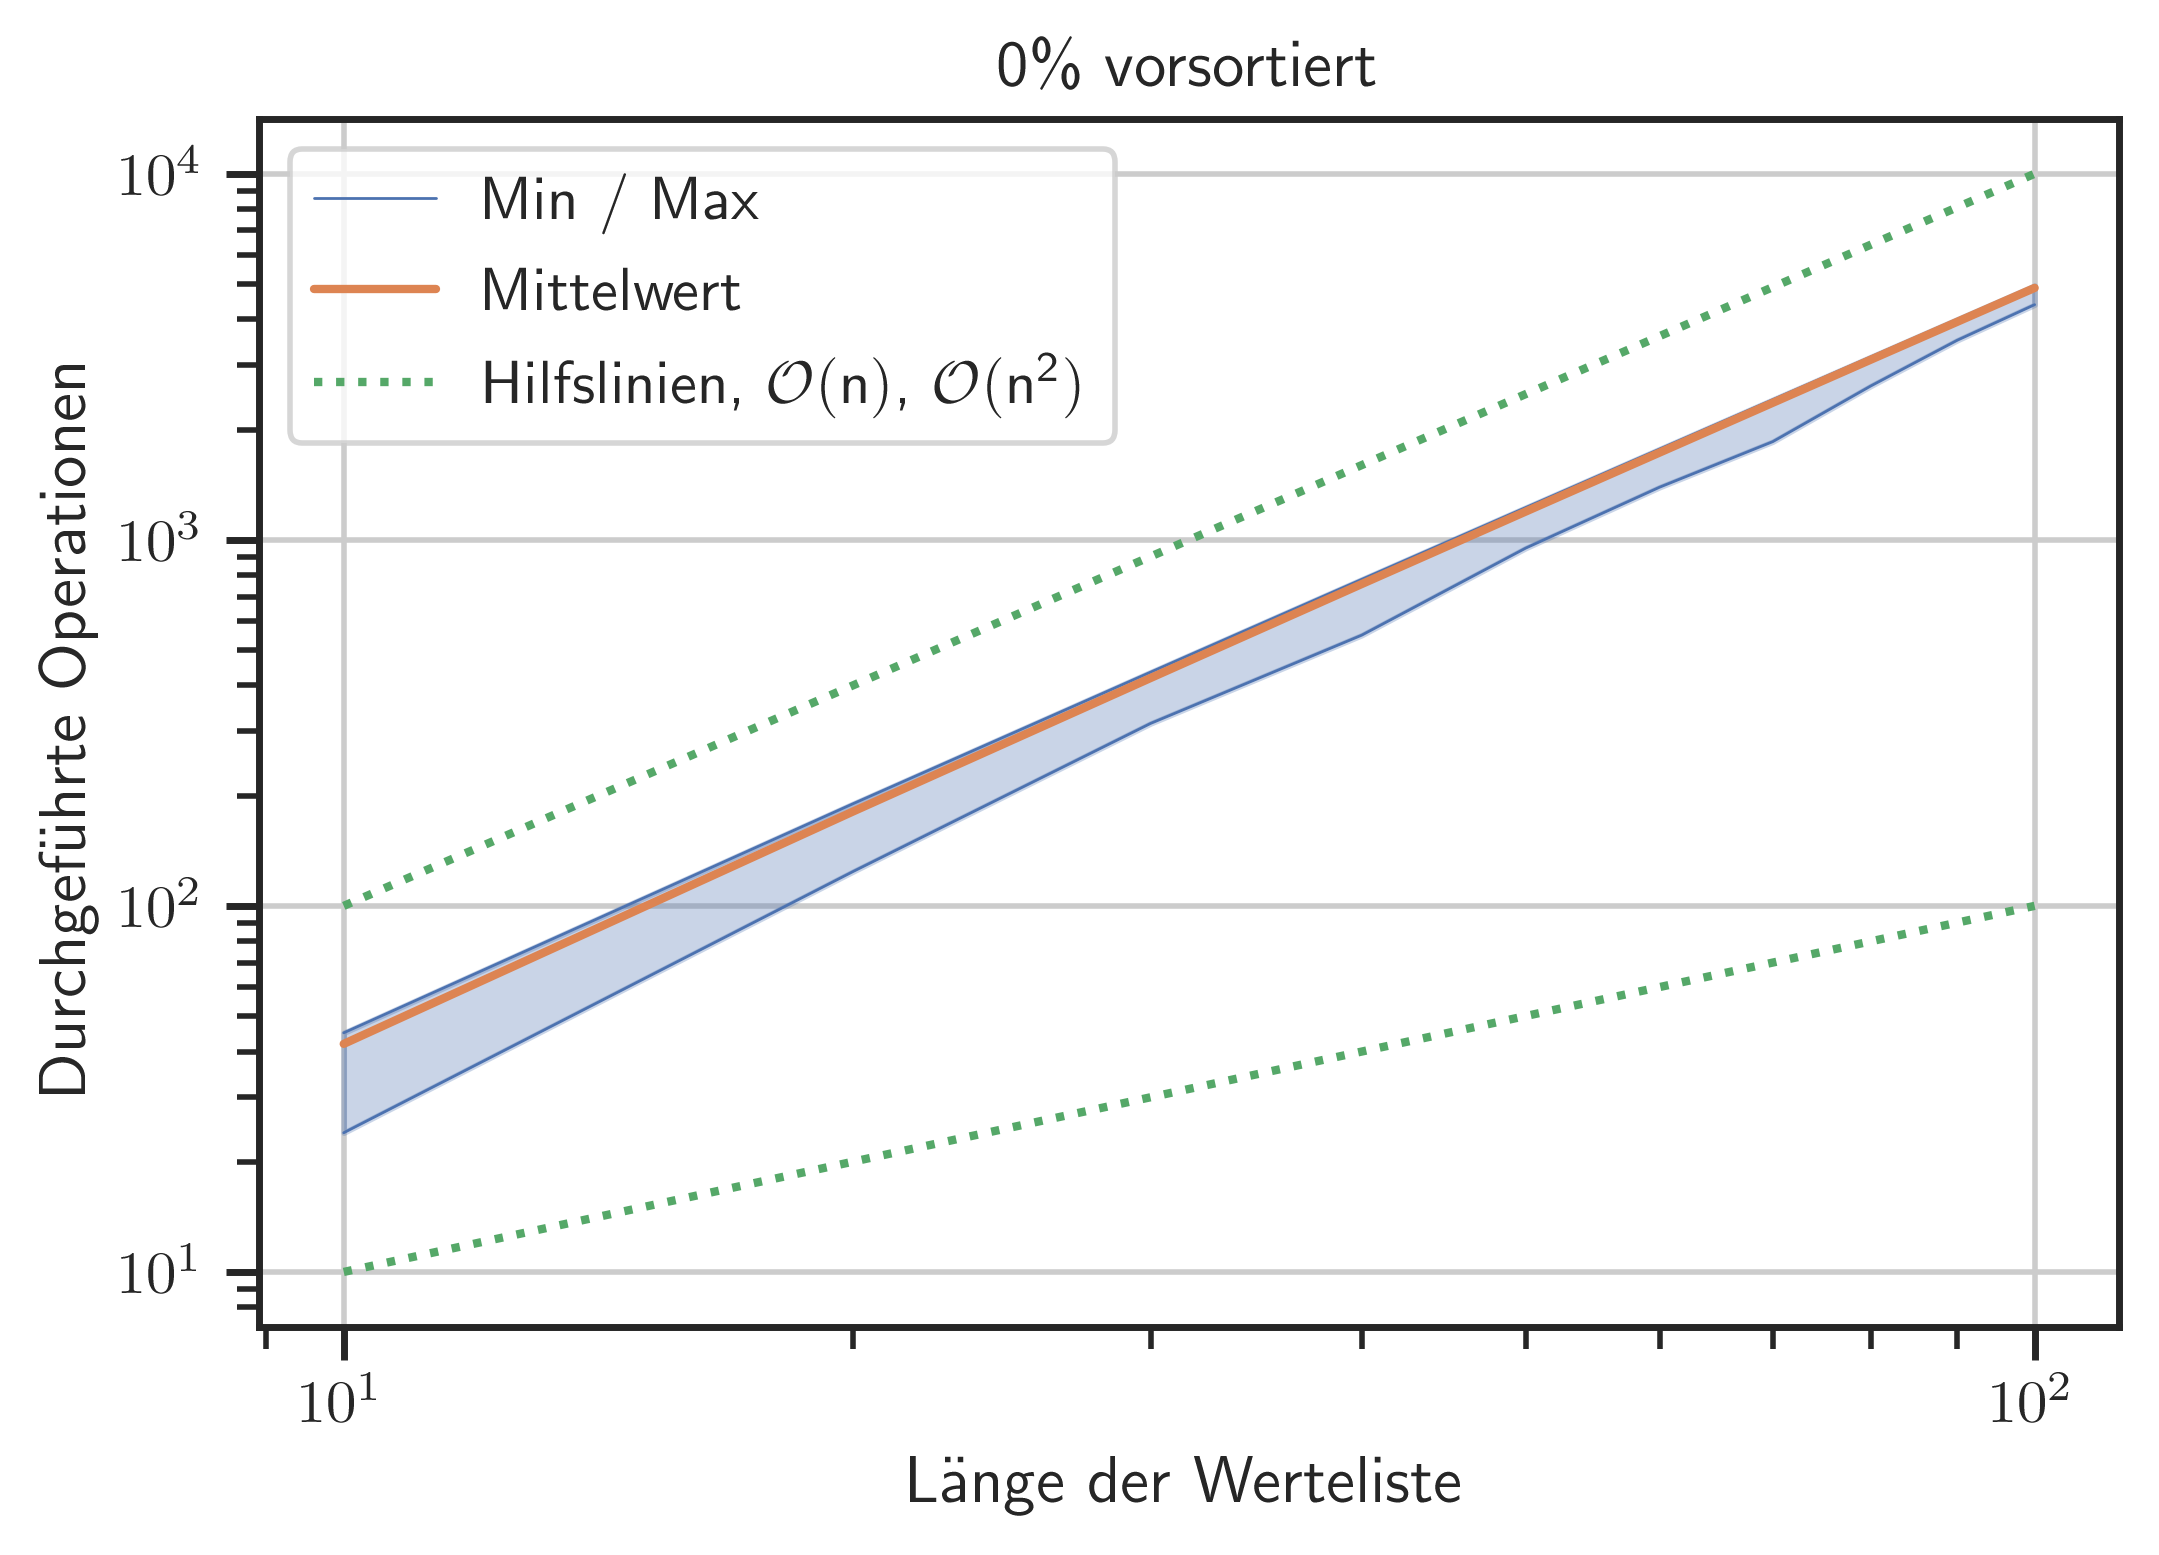

In [47]:
plot_sorting(res2, 'sort_bubble_p000', title='0\% vorsortiert')

In [41]:
res3 = analyse_sorting(sort_bubble, non_rand_p = 0.95, reps = 10000)

10 29.8145
20 126.9318
30 306.1134
40 545.0822
50 906.9837
60 1316.2933
70 1861.6145
80 2459.9003
90 3195.3068
100 3959.114


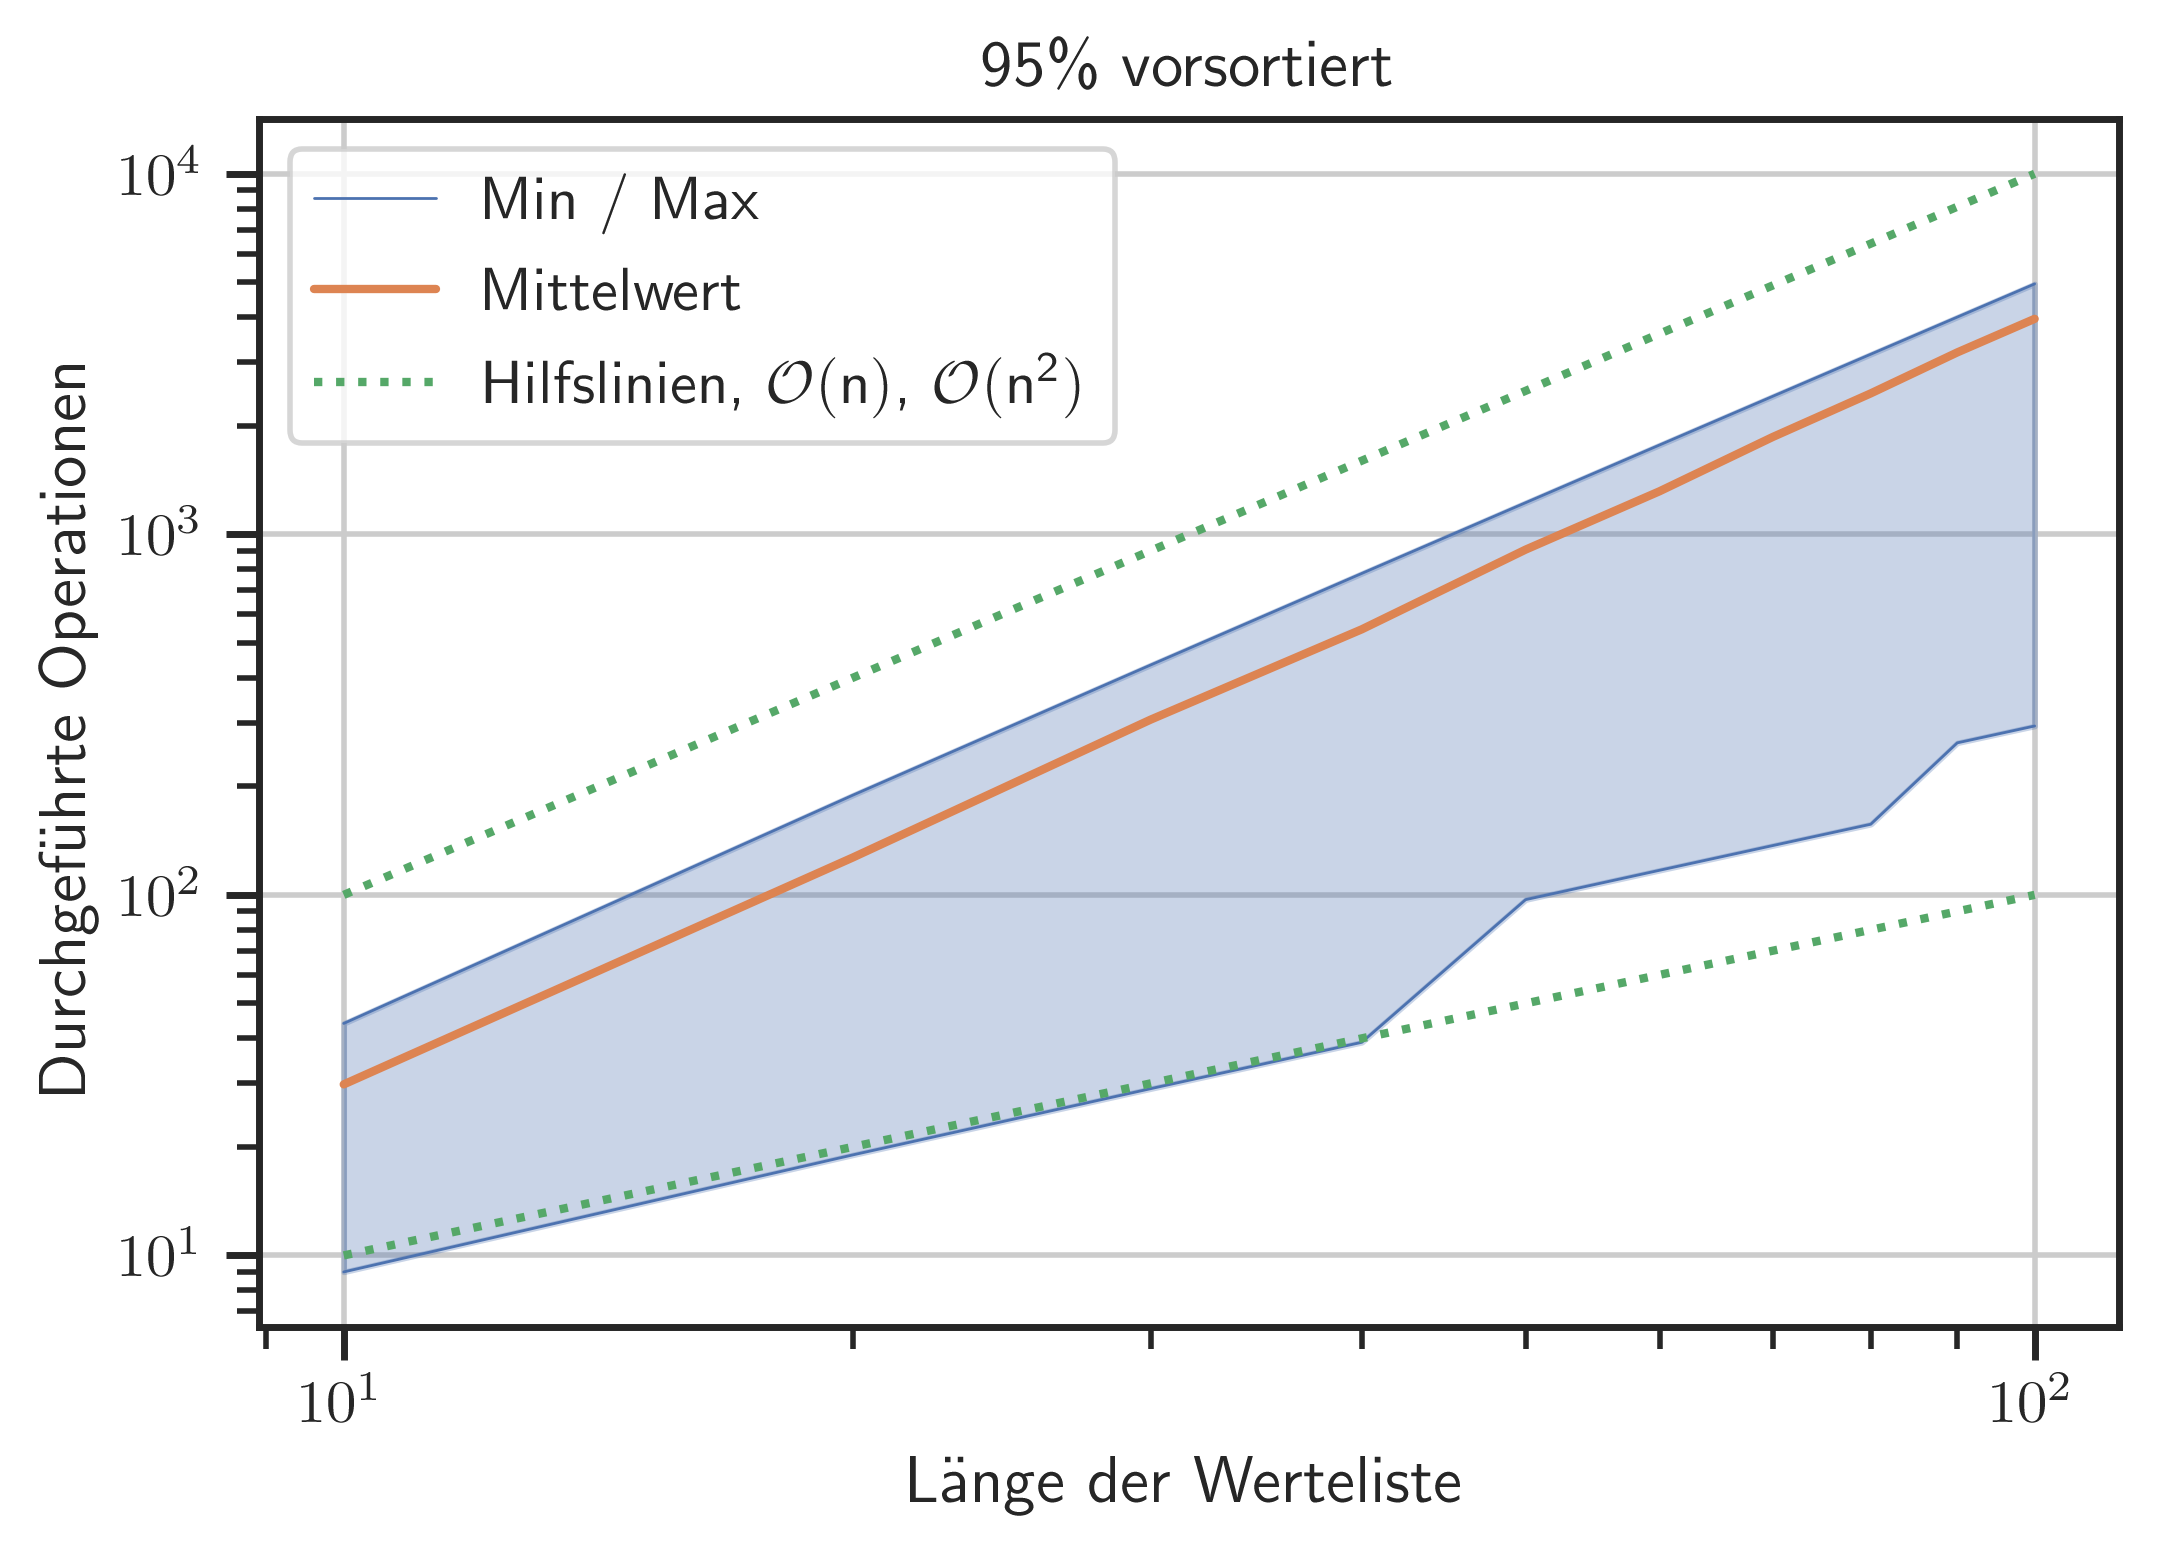

In [45]:
plot_sorting(res3, 'sort_bubble_p095', title='95\% vorsortiert')